# English & Hindi 

## 1. Imports

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

## 2. Merging
- merging datasets as per requirement and given instructions


In [2]:
# Define file paths
EN_FILE_PATH = "../Datasets/WikiMatrix/WikiMatrix.en-hi.en"
HI_FILE_PATH = "../Datasets/WikiMatrix/WikiMatrix.en-hi.hi"
OUTPUT_FILE_PATH = "../Datasets/WikiMatrix/Merged_en_hi_data.csv"

def process_and_write_to_csv(en_file_path, hi_file_path, output_file_path):
    """
    Reads two text files (English and Hindi), processes line pairs, and writes them to a CSV file.
    """
    with open(en_file_path, "r", encoding="utf-8") as en_file, \
         open(hi_file_path, "r", encoding="utf-8") as hi_file, \
         open(output_file_path, "w", encoding="utf-8", newline="") as csv_file:
        
        writer = csv.writer(csv_file)
        writer.writerow(["English", "Hindi"])  # Write header

        for en_sentence, hi_sentence in zip(en_file, hi_file):
            writer.writerow([en_sentence.strip(), hi_sentence.strip()])

        print(f"Data written successfully to '{output_file_path}'")

if __name__ == "__main__":
    # Call the function to process and write to CSV
    process_and_write_to_csv(EN_FILE_PATH, HI_FILE_PATH, OUTPUT_FILE_PATH)


Data written successfully to '../Datasets/WikiMatrix/Merged_en_hi_data.csv'


In [3]:
# Load the processed data and configure pandas display options
raw_data = pd.read_csv(OUTPUT_FILE_PATH)
pd.set_option('display.max_colwidth', None)
# Display 10 random samples from the dataset
raw_data.sample(10,random_state=44)

English  \
131028                                               A 2005 IPCC review of ozone observations and model calculations concluded that the global amount of ozone has now approximately stabilized.   
178533                                              Named in both one-day squads for the tour of England, and in the Champions Trophy squad, White's role in the team was now that of a batsman.   
118901  During the Division Bell Tour, an unknown person using the name Publius posted a message on an internet newsgroup inviting fans to solve a riddle supposedly concealed in the new album.   
216561                                                                                                                                          The evidence of this can be still be seen today.   
174828                                                                                                                                           The production of genever came 100 years later.   
20263                                                Forests in New Guinea alone contain 251 tree species with edible fruits, of which only 43 had been established as cultivated crops by 1985.   
70100                                                                                                                                  It planned to acquire a total of nine C-130J-30s in 2008.   
10981                                                                Ashwin continued to succeed in the subcontinent but proved to be less effective in other places like Australia and England.   
35881                                                                                      Bandar Abbas International Airport has capacity and facilities for landing large transport airplanes.   
163601                                                                                                     They deliver the poor that crieth, the fatherless and him that hath none to help him.   

                                                                                                                                                                                      Hindi  
131028                                 ओजोन मुद्दों पर एक 2005 आईपीसीसी (IPCC) सारांश बताता है कि प्रेक्षणों और गणनाओं के अनुसार ओजोन रिक्तीकरण की वैश्विक औसत राशि अब लगभग स्थिर हो गई है।  
178533                                                           इंग्लैंड के दौरे और चैंपियंस ट्रॉफी के लिए एक दिवसीय टीम में चुने जाने के बाद, टीम में अब व्हाइट भूमिका एक बल्लेबाज की थी।  
118901  बैंड के डिविज़न बेल दौरे के दौरान, पब्लिअस नाम के एक अज्ञात व्यक्ति ने, नए एल्बम में छुपी पहेली हल करने के लिए प्रशंसकों को आमंत्रित करते हुए एक इंटरनेट न्यूज़ग्रुप पर संदेश डाला।  
216561                                                                                                                                                          जिसके सबूत आज भी मिलते हैं।  
174828                                                                                                                                        बड़ी मूर्ति का निर्माण लगभग 100 वर्ष बाद हुआ।  
20263                                          अकेले न्यू गिनी में खाने लायक फलों के वृक्षों की 251 प्रजातियाँ हैं, जिनमे से 1985 तक केवल 43 को खेती की फसल के रूप में स्थापित किया गया है।  
70100                                                                                                                         इसने 2008 में कुल 9 सी-300जे-30 के अधिग्रहण की योजना बनाई थी।  
10981                                                                           अश्विन उपमहाद्वीप में सफल होते रहे लेकिन ऑस्ट्रेलिया और इंग्लैंड जैसे अन्य स्थानों पर कम प्रभावी साबित हुए।  
35881                                                                              बंदर अब्बास अंतरराष्ट्रीय हवाई अड्डे के पास बड़े परिवहन हवाई जहाज लैंडिंग के लिए क्षमता और सुविधाएं हैं।  
163601                                                                                  यदि साझेदारों में आपस में कोई विवाद हो ज

Random Sampling Check:
- The processed data is loaded from the specified CSV file into a pandas DataFrame.
- `pd.set_option('display.max_colwidth', None)` ensures that no truncation occurs when displaying long text values in the DataFrame.
- A random sample of 10 rows is selected using `sample(10)` to visually inspect the data.
  This step is performed to verify the correctness of the 'source' and 'target' pairs.


## 3. checking for null values


In [4]:
# 1. Check for null values
print("Checking for null values...")
print(raw_data.isnull().sum())


Checking for null values...
English    1
Hindi      1
dtype: int64


In [5]:
raw_data.dropna(inplace=True)

## 4. checking for duplicate values


In [6]:
print("\nChecking for duplicate rows...")
duplicate_count = raw_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")



Checking for duplicate rows...
Number of duplicate rows: 0


In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231459 entries, 0 to 231458
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   English  231459 non-null  object
 1   Hindi    231459 non-null  object
dtypes: object(2)
memory usage: 5.3+ MB


## 5. Word count and visualisation


In [8]:
# Add columns for word count in both English and Hindi sentences
raw_data['English_word_count'] = raw_data['English'].str.split().apply(len)
raw_data['Hindi_word_count'] = raw_data['Hindi'].str.split().apply(len)

# Display the updated dataframe with word count columns
raw_data


English  \
0                                                                                        Recite in the name of your Lord who created—Created man from a clinging substance.   
1                                                                                                                                          They were tenants to their lord.   
2                                                                                                                                   Indeed your Lord is the All-beneficent.   
3                                                                                                                                     I mean, we all lived in this century.   
4                                                                                                                                                 Be steadfastly righteous!   
...                                                                                                                                                                     ...   
231454              As of 2009, there are 79 public schools run by the Ministry of Education that serve Emiratis and expatriate Arab people as well as 145 private schools.   
231455                                                                                                              Latin is also an option which can be taken from Year 7.   
231456                                                                                                                          Siege Weapons of the Far East: AD 300–1300.   
231457                                                       Five points in general position suffice to provide these five pieces of information, while four points do not.   
231458  Prior to his career in professional wrestling Hellwig was an amateur bodybuilder, competing in a number of NPC contests and winning the 1984 NPC Mr. Georgia crown.   

                                                                                                                                                                                            Hindi  \
0                                                                                                                                 अपने परवरदिगार का नाम ले कर पढ़ो, जिसने (दुनिया को) पैदा ‎किया।   
1                                                                                                                                  अतः वे अपने इष्ट परम प्रभु की उपासना में ही दत्तचित्त रहते थे।   
2                                                                                                                                                                              तुम्हारा रब एक है।   
3                                                                                                                                                     मेरा मतलब है, हम सभी को इस सदी में रहते थे।   
4                                                                                                                                                                     अतः तुम वही करो जो उचित है।   
...                                                                                                                                                                                           ...   
231454                         2006 में, वहाँ 88 सार्वजनिक स्कूल है जो शिक्षा मंत्रालय द्वारा संचालित है जो अमीराती लोगों और प्रवासी लोगों को सेवा प्रदान करते है और साथ ही 132 निजी स्कूल भी है।   
231455                                                                                                                                   7 सात वर्ष के बाद खाते से आंशिक निकासी भी की जा सकती है।   
231456                                                                                                                                        इतिहासकार इसे ईसा पूर्व 3300-1300 का काल मानते हैं।   
231457  उपर्युक्त पाँच स्वयं तथ्यों में से चार तो इतने सरल तथा सप्ष्ट हैं कि इन्हें सिद्ध करन

In [9]:
raw_data['English_word_count'].describe()

count    231459.000000
mean         17.753118
std          44.143017
min           1.000000
25%          10.000000
50%          15.000000
75%          23.000000
max       17848.000000
Name: English_word_count, dtype: float64

## 6. looking at longer sentences

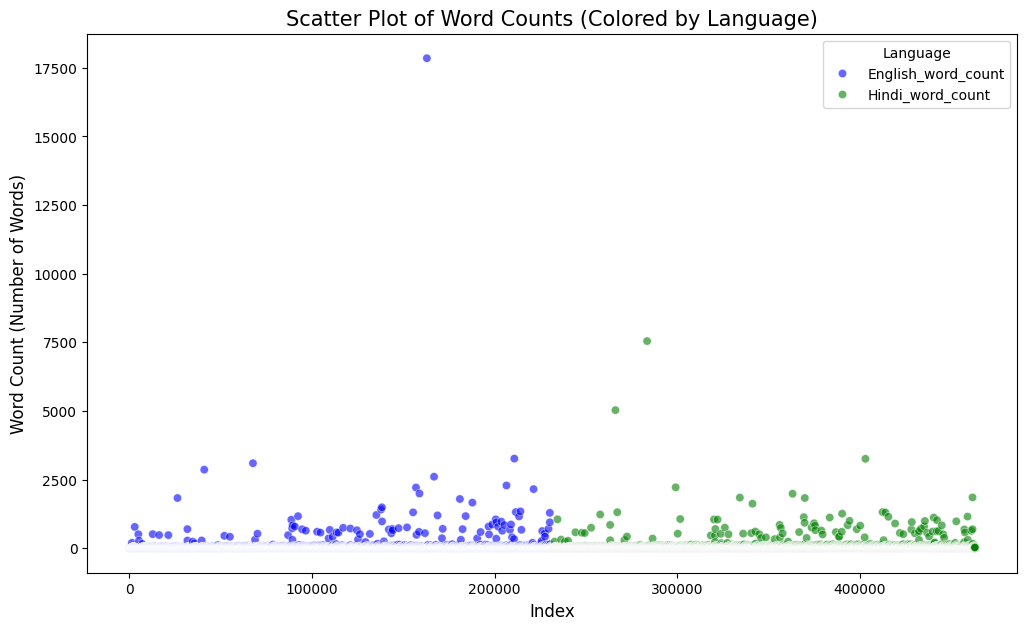

In [10]:
# Create a new DataFrame with sentence indices and word counts for both English and Hindi
scatter_data = raw_data[['English_word_count', 'Hindi_word_count']].melt(var_name='Language', value_name='Word_Count')

# Map 'Language' to colors
scatter_data['Color'] = scatter_data['Language'].map({'English_word_count': 'blue', 'Hindi_word_count': 'green'})

# Create a scatter plot
plt.figure(figsize=(12, 7))
sns.scatterplot(x=range(len(scatter_data)), y='Word_Count', hue='Language', data=scatter_data, palette={'English_word_count': 'blue', 'Hindi_word_count': 'green'}, alpha=0.6)

# Add titles and labels
plt.title("Scatter Plot of Word Counts (Colored by Language)", fontsize=15)
plt.xlabel("Index", fontsize=12)
plt.ylabel("Word Count (Number of Words)", fontsize=12)

# Show the plot
plt.show()



### Explanation:
1. **Data Transformation**:
   - The `melt()` function is used to combine the two word count columns (`English_word_count` and `Hindi_word_count`) into a single column (`Word_Count`), with a corresponding `Language` column that indicates whether the word count is from the English or Hindi column.

2. **Color Mapping**:
   - The `Color` column is created by mapping the `Language` values (`English_word_count` and `Hindi_word_count`) to colors (`blue` for English and `green` for Hindi).

3. **Scatter Plot**:
   - `sns.scatterplot()` is used to plot the scatter plot:
     - `x=range(len(scatter_data))` sets the x-axis as the index of the data points (i.e., the position of each sentence).
     - `y='Word_Count'` plots the word count for each sentence.
     - `hue='Language'` colors the points based on the language (English or Hindi).
     - `palette={'English_word_count': 'blue', 'Hindi_word_count': 'green'}` specifies the colors for each language.

4. **Plot Customization**:
   - The `plt.xlabel()` and `plt.ylabel()` set the labels for the x and y axes, respectively.
   - `plt.title()` adds the plot title.

---

### Output:
- The scatter plot will show the word count for each sentence, with points colored according to whether the word count belongs to English or Hindi (`blue` for English and `green` for Hindi).
- The **x-axis** will represent the sentence index, and the **y-axis** will represent the word count.


In [11]:
# Filter rows where English word count is greater than 200
filtered_data = raw_data[raw_data['English_word_count'] > 100]
filtered_data = raw_data[raw_data['Hindi_word_count'] > 100]


# Display the filtered rows
filtered_data[['English', 'Hindi', 'English_word_count', 'Hindi_word_count']]


English  \
1357                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

## 7. Removing outliers


In [12]:
# Filter rows where English_word_count is greater than 100
filtered_data_english = raw_data[raw_data['English_word_count'] > 100]

# Filter rows where Hindi_word_count is greater than 100
filtered_data_hindi = raw_data[raw_data['Hindi_word_count'] > 100]

# Combine the indices of both filtered DataFrames
indices_to_drop = filtered_data_english.index.union(filtered_data_hindi.index)

# Drop the rows with the combined indices from the original DataFrame
raw_data.drop(indices_to_drop, inplace=True)

# Display the updated DataFrame
raw_data[['English', 'Hindi', 'English_word_count', 'Hindi_word_count']]

English  \
0                                                                                        Recite in the name of your Lord who created—Created man from a clinging substance.   
1                                                                                                                                          They were tenants to their lord.   
2                                                                                                                                   Indeed your Lord is the All-beneficent.   
3                                                                                                                                     I mean, we all lived in this century.   
4                                                                                                                                                 Be steadfastly righteous!   
...                                                                                                                                                                     ...   
231454              As of 2009, there are 79 public schools run by the Ministry of Education that serve Emiratis and expatriate Arab people as well as 145 private schools.   
231455                                                                                                              Latin is also an option which can be taken from Year 7.   
231456                                                                                                                          Siege Weapons of the Far East: AD 300–1300.   
231457                                                       Five points in general position suffice to provide these five pieces of information, while four points do not.   
231458  Prior to his career in professional wrestling Hellwig was an amateur bodybuilder, competing in a number of NPC contests and winning the 1984 NPC Mr. Georgia crown.   

                                                                                                                                                                                            Hindi  \
0                                                                                                                                 अपने परवरदिगार का नाम ले कर पढ़ो, जिसने (दुनिया को) पैदा ‎किया।   
1                                                                                                                                  अतः वे अपने इष्ट परम प्रभु की उपासना में ही दत्तचित्त रहते थे।   
2                                                                                                                                                                              तुम्हारा रब एक है।   
3                                                                                                                                                     मेरा मतलब है, हम सभी को इस सदी में रहते थे।   
4                                                                                                                                                                     अतः तुम वही करो जो उचित है।   
...                                                                                                                                                                                           ...   
231454                         2006 में, वहाँ 88 सार्वजनिक स्कूल है जो शिक्षा मंत्रालय द्वारा संचालित है जो अमीराती लोगों और प्रवासी लोगों को सेवा प्रदान करते है और साथ ही 132 निजी स्कूल भी है।   
231455                                                                                                                                   7 सात वर्ष के बाद खाते से आंशिक निकासी भी की जा सकती है।   
231456                                                                                                                                        इतिहासकार इसे ईसा पूर्व 3300-1300 का काल मानते हैं।   
231457  उपर्युक्त पाँच स्वयं तथ्यों में से चार तो इतने सरल तथा सप्ष्ट हैं कि इन्हें सिद्ध करन

### Explanation:
1. **Filtering and Dropping Rows**:
   - `raw_data[raw_data['English_word_count'] > 100].index` gives the indices of the rows where the English word count is greater than 200.
   - `raw_data.drop(..., inplace=True)` removes those rows from the `raw_data` DataFrame, modifying it in place.

2. **Displaying the Updated DataFrame**:
   - After dropping the rows, `head()` is used to display the first few rows of the updated DataFrame to verify that the rows have been dropped.

---

### Output:
- The rows with an English word count greater than 100 will be removed from the `raw_data` DataFrame.
- The remaining rows will be displayed with the `English`, `Hindi`, `English_word_count`, and `Hindi_word_count` columns.

This operation will modify the original `raw_data` DataFrame directly without creating a new DataFrame.



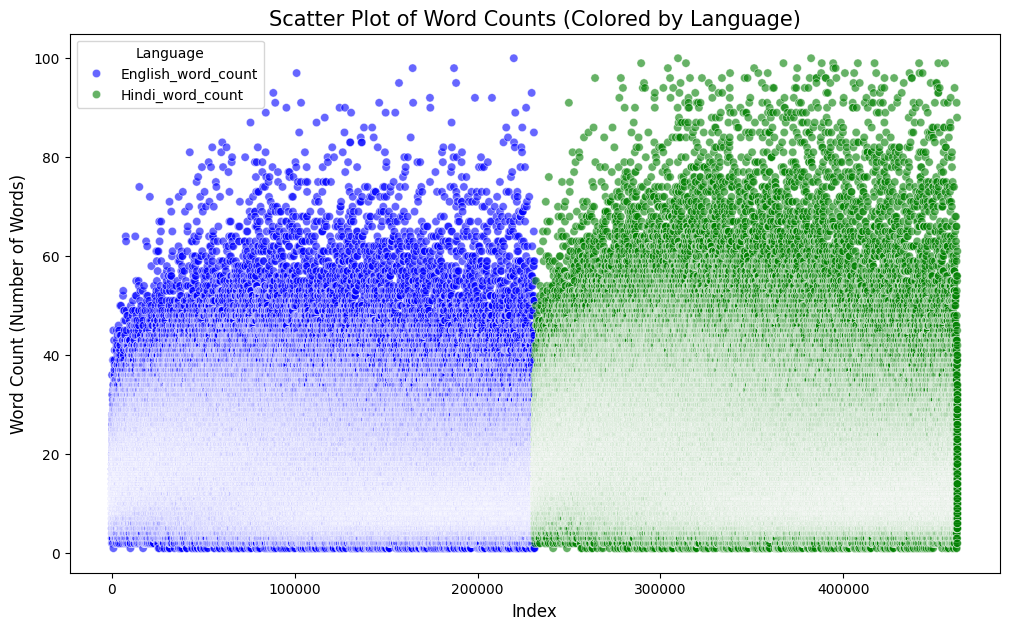

In [13]:
# Create a new DataFrame with sentence indices and word counts for both English and Hindi
scatter_data = raw_data[['English_word_count', 'Hindi_word_count']].melt(var_name='Language', value_name='Word_Count')

# Map 'Language' to colors
scatter_data['Color'] = scatter_data['Language'].map({'English_word_count': 'blue', 'Hindi_word_count': 'green'})

# Create a scatter plot
plt.figure(figsize=(12, 7))
sns.scatterplot(x=range(len(scatter_data)), y='Word_Count', hue='Language', data=scatter_data, palette={'English_word_count': 'blue', 'Hindi_word_count': 'green'}, alpha=0.6)

# Add titles and labels
plt.title("Scatter Plot of Word Counts (Colored by Language)", fontsize=15)
plt.xlabel("Index", fontsize=12)
plt.ylabel("Word Count (Number of Words)", fontsize=12)

# Show the plot
plt.show()

In [14]:
# Check for empty strings in English and Hindi columns
empty_english = raw_data[raw_data['English'].str.strip() == '']
empty_hindi = raw_data[raw_data['Hindi'].str.strip() == '']

# Display rows with empty English strings
print("Rows with empty English strings:")
print(empty_english[['English', 'Hindi', 'English_word_count', 'Hindi_word_count']])

# Display rows with empty Hindi strings
print("\nRows with empty Hindi strings:")
print(empty_hindi[['English', 'Hindi', 'English_word_count', 'Hindi_word_count']])


Rows with empty English strings:
Empty DataFrame
Columns: [English, Hindi, English_word_count, Hindi_word_count]
Index: []

Rows with empty Hindi strings:
Empty DataFrame
Columns: [English, Hindi, English_word_count, Hindi_word_count]
Index: []


## 8. cleaning other language formats.
- As per our task we need to English - Hindi so removing chinese and sanskrit from datasets.

In [15]:
# Define regex patterns to match Chinese, Sanskrit (Devanagari), and Urdu characters
chinese_pattern = r'[\u4e00-\u9fff]'  # Chinese characters
sanskrit_pattern = r'[\u0900-\u097F]'  # Devanagari characters (same as Hindi)
urdu_pattern = r'[\u0600-\u06FF]'     # Arabic script (Urdu)

# Combine the patterns into one regex to detect any of these languages
non_hindi_pattern = chinese_pattern + "|" + sanskrit_pattern + "|" + urdu_pattern

# Filter rows where the Hindi sentence contains any of these characters (non-Hindi)
non_hindi_rows = raw_data[raw_data['English'].str.contains(non_hindi_pattern, regex=True)]

# Display the rows with non-Hindi sentences in the Hindi column
print("Rows with Chinese, Sanskrit, or Urdu sentences in the Hindi column:")
non_hindi_rows[['English', 'Hindi', 'English_word_count', 'Hindi_word_count']]


Rows with Chinese, Sanskrit, or Urdu sentences in the Hindi column:


English  \
303                                                                                                                                                                                                                                                                                  Hidāyah (هداية) guidance from God.   
563                                                                                                                                                                                                                                                            Dār al-Islām (دار الإسلام) the abode, or land, of Islam.   
1041                                                                                                                                                                                                  Jannah (جنة) Paradise, Heaven, the Garden Jazāka-llāhu khayran (جزاك اللهُ خيرًا) "May God reward you with good."   
1312                                                                                                                                                                                                                                                                     Muḥsin (محسن) a person who performs good deed.   
1487                                                                                                                                                                                                                                                                                              गंगाशरण सिंह पुरस्कार   
...                                                                                                                                                                                                                                                                                                                 ...   
229663                                                                                                                                                                                 Muhammad Aurangzeb or Qateel Shifai (Urdu: قتِیل شِفائ ‎), (24 December 1919 – 11 July 2001) was a Pakistani Urdu language poet.   
229765                                                                                                                                                   King Abdulaziz International Airport (KAIA) (Arabic: مطار الملك عبدالعزيز الدولي‎) (IATA: JED, ICAO: OEJN) is an airport located 19 km to the north of Jeddah.   
230491                                                                                                                                                                                                                                                                                 "فروزان؛ ستاره‌ای خاموش می‌شود".   
231191                                                                                                                                                                                                                                                             "पूर्व कांग्रेस सांसद सुरेन्द्र कुमार सिंह का निधन".   
231271  Balkh (/bælx/; Pashto and Persian: بلخ‎, Balkh; Ancient Greek: Βάκτρα, Báktra; Bactrian: Βάχλο, Bakhlo) is a town in the Balkh Province of Afghanistan, about 20 km (12 mi) northwest of the provincial capital, Mazar-e Sharif, and some 74 km (46 mi) south of the Amu Darya river and the Uzbekistan border.   

                                                                                                                                                                                                                                                                                                      Hindi  \
303                                                                                                                                                                                                                         

To detect non-Hindi sentences in the Hindi column and match specific languages like **Chinese**, **Sanskrit**, or **Urdu**, you can use regular expressions to match specific character ranges commonly used in these languages.

Here’s a breakdown of the character ranges we need:
- **Chinese**: Chinese characters are in the **CJK Unified Ideographs** Unicode block, which is from `\u4e00` to `\u9fff`.
- **Sanskrit**: Sanskrit often uses **Devanagari script**, but it can also include characters from the **IAST transliteration** system or **other extended Unicode blocks**. We can focus on the basic Devanagari range for matching Sanskrit (same as Hindi).
- **Urdu**: Urdu is written in the **Arabic script** and falls within the Unicode block `\u0600-\u06FF` (Arabic, including Urdu).

### Regex Pattern for Matching Chinese, Sanskrit, and Urdu Characters:

- **Chinese characters**: `[\u4e00-\u9fff]`
- **Sanskrit (Devanagari)**: `[\u0900-\u097F]` (same as Hindi, but we can modify this for Sanskrit if needed)
- **Urdu**: `[\u0600-\u06FF]`

### Updated Code to Detect Chinese, Sanskrit, or Urdu in the Hindi Column:



### Explanation:
1. **Regex Patterns**:
   - `[\u4e00-\u9fff]`: Matches Chinese characters in the CJK Unified Ideographs block.
   - `[\u0900-\u097F]`: Matches Devanagari characters (used in both Sanskrit and Hindi).
   - `[\u0600-\u06FF]`: Matches characters in the Arabic script (commonly used for Urdu).

2. **Combining Patterns**:
   - The patterns for Chinese, Sanskrit, and Urdu are combined using the `|` (OR) operator to create a single regex pattern that can detect any of these scripts in the Hindi column.

3. **`str.contains()`**:
   - This method checks whether the `Hindi` column contains any characters that match the combined regex pattern, which would indicate that the sentence is written in Chinese, Sanskrit, or Urdu.

4. **Displaying the Rows**:
   - The rows with Chinese, Sanskrit, or Urdu text in the Hindi column are filtered into the `non_hindi_rows` DataFrame and displayed with the relevant columns.

---

### Output:
This will print all rows where the **Hindi** column contains Chinese, Sanskrit (Devanagari), or Urdu characters. You'll see the full row, including the `English`, `Hindi`, `English_word_count`, and `Hindi_word_count` columns.


In [16]:
# Define regex patterns to match Chinese, Sanskrit (Devanagari), and Urdu characters
chinese_pattern = r'[\u4e00-\u9fff]'  # Chinese characters
sanskrit_pattern = r'[\u0900-\u097F]'  # Devanagari characters (same as Hindi)
urdu_pattern = r'[\u0600-\u06FF]'     # Arabic script (Urdu)

# Combine the patterns into one regex to detect any of these languages
non_hindi_pattern = chinese_pattern + "|" + sanskrit_pattern + "|" + urdu_pattern

# Drop rows where the English sentence contains any of these characters (non-English)
raw_data.drop(raw_data[raw_data['English'].str.contains(non_hindi_pattern, regex=True)].index, inplace=True)

# Display the updated DataFrame to verify
raw_data[['English', 'Hindi', 'English_word_count', 'Hindi_word_count']]


English  \
0                                                                                        Recite in the name of your Lord who created—Created man from a clinging substance.   
1                                                                                                                                          They were tenants to their lord.   
2                                                                                                                                   Indeed your Lord is the All-beneficent.   
3                                                                                                                                     I mean, we all lived in this century.   
4                                                                                                                                                 Be steadfastly righteous!   
...                                                                                                                                                                     ...   
231454              As of 2009, there are 79 public schools run by the Ministry of Education that serve Emiratis and expatriate Arab people as well as 145 private schools.   
231455                                                                                                              Latin is also an option which can be taken from Year 7.   
231456                                                                                                                          Siege Weapons of the Far East: AD 300–1300.   
231457                                                       Five points in general position suffice to provide these five pieces of information, while four points do not.   
231458  Prior to his career in professional wrestling Hellwig was an amateur bodybuilder, competing in a number of NPC contests and winning the 1984 NPC Mr. Georgia crown.   

                                                                                                                                                                                            Hindi  \
0                                                                                                                                 अपने परवरदिगार का नाम ले कर पढ़ो, जिसने (दुनिया को) पैदा ‎किया।   
1                                                                                                                                  अतः वे अपने इष्ट परम प्रभु की उपासना में ही दत्तचित्त रहते थे।   
2                                                                                                                                                                              तुम्हारा रब एक है।   
3                                                                                                                                                     मेरा मतलब है, हम सभी को इस सदी में रहते थे।   
4                                                                                                                                                                     अतः तुम वही करो जो उचित है।   
...                                                                                                                                                                                           ...   
231454                         2006 में, वहाँ 88 सार्वजनिक स्कूल है जो शिक्षा मंत्रालय द्वारा संचालित है जो अमीराती लोगों और प्रवासी लोगों को सेवा प्रदान करते है और साथ ही 132 निजी स्कूल भी है।   
231455                                                                                                                                   7 सात वर्ष के बाद खाते से आंशिक निकासी भी की जा सकती है।   
231456                                                                                                                                        इतिहासकार इसे ईसा पूर्व 3300-1300 का काल मानते हैं।   
231457  उपर्युक्त पाँच स्वयं तथ्यों में से चार तो इतने सरल तथा सप्ष्ट हैं कि इन्हें सिद्ध करन

## 9. Distribution of both languages.

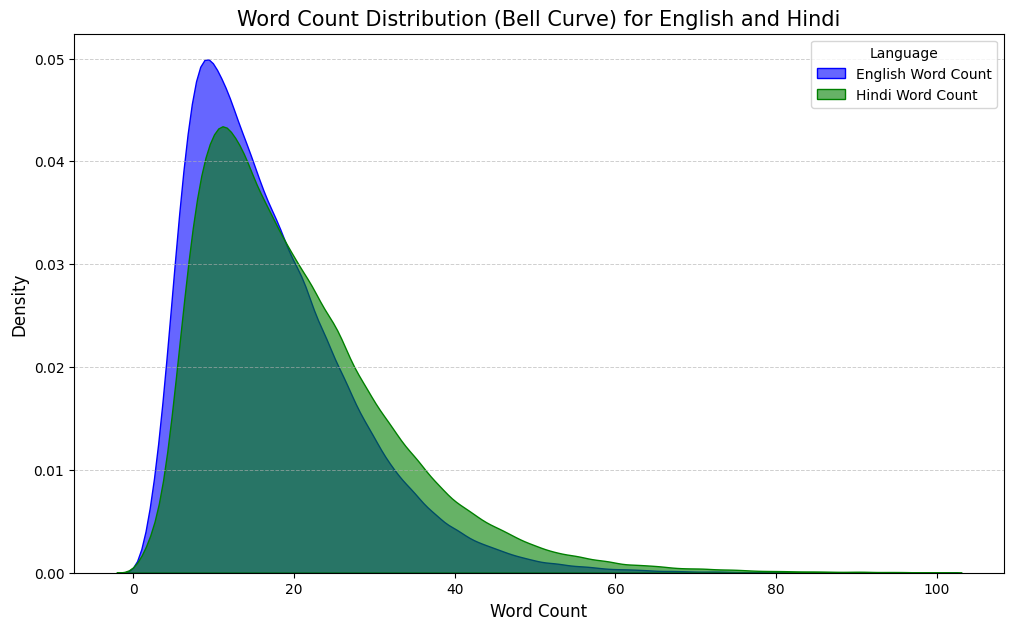

English Word Count - Mean: 17.271603865783472  Std Dev: 10.378314285297423
Hindi Word Count - Mean: 20.44195460962102  Std Dev: 12.336790958318668


In [17]:
# Plot the distribution of the word counts in the English and Hindi columns

plt.figure(figsize=(12, 7))

# Plot for English word count
sns.kdeplot(raw_data['English_word_count'], label='English Word Count', fill=True, color='blue', alpha=0.6)

# Plot for Hindi word count
sns.kdeplot(raw_data['Hindi_word_count'], label='Hindi Word Count', fill=True, color='green', alpha=0.6)

# Add titles and labels
plt.title('Word Count Distribution (Bell Curve) for English and Hindi', fontsize=15)
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title="Language")
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

# Show the plot
plt.show()

# Print the mean and standard deviation for both English and Hindi word counts
print("English Word Count - Mean:", raw_data['English_word_count'].mean(), " Std Dev:", raw_data['English_word_count'].std())
print("Hindi Word Count - Mean:", raw_data['Hindi_word_count'].mean(), " Std Dev:", raw_data['Hindi_word_count'].std())


To plot a **bell curve** (normal distribution) of sentence lengths or word counts, we can use **seaborn** and **matplotlib** to visualize the distribution. This will help us understand the mean and the most frequent values, as well as whether the data roughly follows a normal distribution (bell curve).

We can plot the distribution of the **English word count** and **Hindi word count** columns as individual bell curves to check for the frequency and spread of these values.

### Code to Plot Bell Curve for English and Hindi Word Counts:

### Explanation:
1. **Kernel Density Estimate (KDE) Plot**: 
   - `sns.kdeplot()` is used to plot the **kernel density estimate** (KDE), which is a smoothed version of the histogram and can give us an idea of the distribution (bell curve).
   - We plot the **English word count** and **Hindi word count** separately on the same graph with different colors.

2. **`fill=True`**: This option fills the area under the curve to make it visually appealing and easier to interpret.
   
3. **Mean and Standard Deviation**: 
   - The mean and standard deviation of both the **English** and **Hindi word counts** are printed, which will help us understand the central tendency (mean) and spread (standard deviation) of the data.

4. **Plot Appearance**:
   - We use **blue** for English word counts and **green** for Hindi word counts, and labels are added to make it clear.
   - A **grid** is added to help with reading values on the Y-axis.

### Expected Output:
- The plot will display two smoothed curves (KDEs), one for English word counts and one for Hindi word counts.
- The **mean** will indicate where the center of the distribution lies, and the **standard deviation** will show how spread out the values are.
- If the data follows a bell curve, it should have a symmetric shape, with the peak around the mean.


## 10. limiting the datasets by sentence length.
- After understanding the data distribution we can eliminate few more instances of dataset based on wordcount.

In [18]:
# Drop rows where Hindi word count is more than 50
raw_data.drop(raw_data[raw_data['Hindi_word_count'] > 50].index, inplace=True)

# Display the updated DataFrame to verify
raw_data[['English', 'Hindi', 'English_word_count', 'Hindi_word_count']]


English  \
0                                                                                        Recite in the name of your Lord who created—Created man from a clinging substance.   
1                                                                                                                                          They were tenants to their lord.   
2                                                                                                                                   Indeed your Lord is the All-beneficent.   
3                                                                                                                                     I mean, we all lived in this century.   
4                                                                                                                                                 Be steadfastly righteous!   
...                                                                                                                                                                     ...   
231454              As of 2009, there are 79 public schools run by the Ministry of Education that serve Emiratis and expatriate Arab people as well as 145 private schools.   
231455                                                                                                              Latin is also an option which can be taken from Year 7.   
231456                                                                                                                          Siege Weapons of the Far East: AD 300–1300.   
231457                                                       Five points in general position suffice to provide these five pieces of information, while four points do not.   
231458  Prior to his career in professional wrestling Hellwig was an amateur bodybuilder, competing in a number of NPC contests and winning the 1984 NPC Mr. Georgia crown.   

                                                                                                                                                                                            Hindi  \
0                                                                                                                                 अपने परवरदिगार का नाम ले कर पढ़ो, जिसने (दुनिया को) पैदा ‎किया।   
1                                                                                                                                  अतः वे अपने इष्ट परम प्रभु की उपासना में ही दत्तचित्त रहते थे।   
2                                                                                                                                                                              तुम्हारा रब एक है।   
3                                                                                                                                                     मेरा मतलब है, हम सभी को इस सदी में रहते थे।   
4                                                                                                                                                                     अतः तुम वही करो जो उचित है।   
...                                                                                                                                                                                           ...   
231454                         2006 में, वहाँ 88 सार्वजनिक स्कूल है जो शिक्षा मंत्रालय द्वारा संचालित है जो अमीराती लोगों और प्रवासी लोगों को सेवा प्रदान करते है और साथ ही 132 निजी स्कूल भी है।   
231455                                                                                                                                   7 सात वर्ष के बाद खाते से आंशिक निकासी भी की जा सकती है।   
231456                                                                                                                                        इतिहासकार इसे ईसा पूर्व 3300-1300 का काल मानते हैं।   
231457  उपर्युक्त पाँच स्वयं तथ्यों में से चार तो इतने सरल तथा सप्ष्ट हैं कि इन्हें सिद्ध करन

In [19]:
# Convert all text in the 'English' column to lowercase
raw_data['English'] = raw_data['English'].str.lower()

# Verify the changes
raw_data  # Display a random sample of 10 rows


English  \
0                                                                                        recite in the name of your lord who created—created man from a clinging substance.   
1                                                                                                                                          they were tenants to their lord.   
2                                                                                                                                   indeed your lord is the all-beneficent.   
3                                                                                                                                     i mean, we all lived in this century.   
4                                                                                                                                                 be steadfastly righteous!   
...                                                                                                                                                                     ...   
231454              as of 2009, there are 79 public schools run by the ministry of education that serve emiratis and expatriate arab people as well as 145 private schools.   
231455                                                                                                              latin is also an option which can be taken from year 7.   
231456                                                                                                                          siege weapons of the far east: ad 300–1300.   
231457                                                       five points in general position suffice to provide these five pieces of information, while four points do not.   
231458  prior to his career in professional wrestling hellwig was an amateur bodybuilder, competing in a number of npc contests and winning the 1984 npc mr. georgia crown.   

                                                                                                                                                                                            Hindi  \
0                                                                                                                                 अपने परवरदिगार का नाम ले कर पढ़ो, जिसने (दुनिया को) पैदा ‎किया।   
1                                                                                                                                  अतः वे अपने इष्ट परम प्रभु की उपासना में ही दत्तचित्त रहते थे।   
2                                                                                                                                                                              तुम्हारा रब एक है।   
3                                                                                                                                                     मेरा मतलब है, हम सभी को इस सदी में रहते थे।   
4                                                                                                                                                                     अतः तुम वही करो जो उचित है।   
...                                                                                                                                                                                           ...   
231454                         2006 में, वहाँ 88 सार्वजनिक स्कूल है जो शिक्षा मंत्रालय द्वारा संचालित है जो अमीराती लोगों और प्रवासी लोगों को सेवा प्रदान करते है और साथ ही 132 निजी स्कूल भी है।   
231455                                                                                                                                   7 सात वर्ष के बाद खाते से आंशिक निकासी भी की जा सकती है।   
231456                                                                                                                                        इतिहासकार इसे ईसा पूर्व 3300-1300 का काल मानते हैं।   
231457  उपर्युक्त पाँच स्वयं तथ्यों में से चार तो इतने सरल तथा सप्ष्ट हैं कि इन्हें सिद्ध करन

### What This Does:
- `str.lower()` converts all uppercase letters to lowercase.
- This ensures case consistency in the text data.

Let me know if you want to apply further transformations or explore any other cleaning methods!

### Impact:
- Reducing Vocabulary Size: Lowercasing can reduce the vocabulary size, which can lead to faster training and inference.


In [20]:
# Select only the 'English' and 'Hindi' columns
processed_data = raw_data[['English', 'Hindi']]

# Define the output file path
processed_output_path = "../Datasets/WikiMatrix/Processed/processed_en-hi.csv"

# Write the processed data to a CSV file
processed_data.to_csv(processed_output_path, index=False, encoding='utf-8')

print(f"Processed data has been saved to: {processed_output_path}")


Processed data has been saved to: ../Datasets/WikiMatrix/Processed/processed_en-hi.csv


In [21]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224194 entries, 0 to 231458
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   English  224194 non-null  object
 1   Hindi    224194 non-null  object
dtypes: object(2)
memory usage: 5.1+ MB


# English & Greek 

## 1. Imports

In [22]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

## 2. Merging
- merging datasets as per requirement and given instructions


In [23]:
# Define file paths
EN_FILE_PATH = "../Datasets/WikiMatrix/WikiMatrix.el-en.en"
EL_FILE_PATH = "../Datasets/WikiMatrix/WikiMatrix.el-en.el"
OUTPUT_FILE_PATH = "../Datasets/WikiMatrix/Merged_en_el_data.csv"

def process_and_write_to_csv(en_file_path, el_file_path, output_file_path):
    """
    Reads two text files (English and Greek), processes line pairs, and writes them to a CSV file.
    """
    with open(en_file_path, "r", encoding="utf-8") as en_file, \
         open(el_file_path, "r", encoding="utf-8") as el_file, \
         open(output_file_path, "w", encoding="utf-8", newline="") as csv_file:
        
        writer = csv.writer(csv_file)
        writer.writerow(["English", "Greek"])  # Write header

        for en_sentence, el_sentence in zip(en_file, el_file):
            writer.writerow([en_sentence.strip(), el_sentence.strip()])

        print(f"Data written successfully to '{output_file_path}'")

if __name__ == "__main__":
    # Call the function to process and write to CSV
    process_and_write_to_csv(EN_FILE_PATH, EL_FILE_PATH, OUTPUT_FILE_PATH)


Data written successfully to '../Datasets/WikiMatrix/Merged_en_el_data.csv'


In [24]:
# Load the processed data and configure pandas display options
raw_data = pd.read_csv(OUTPUT_FILE_PATH)
pd.set_option('display.max_colwidth', None)
# Display 10 random samples from the dataset
raw_data.sample(10,random_state=44)

English  \
41149                                                                                                                       In addition, it is one of the least massive planets found within the nearest 20 light-years.   
210972                                                                                     Forced labour was introduced, and the authorities confiscated the Greek business property and gave it to Bulgarian colonists.   
444053                                  Talas secured a place in history by virtue of the Battle of Talas (751 CE), which was fought between forces of the Chinese Tang Dynasty and those of the Arab Abbasid Caliphate.   
501609                                                                                                            When only one type of protein subunit is used in the complex, it is called a homo-oligomer or homomer.   
370825                                                                                         If n and m are both one, then the derivative f ′(a) is a number and the expression f ′(a)v is the product of two numbers.   
189855                                                            Killing originally made a mistake in the classification, listing two exceptional rank 4 root systems, when in fact there is only one, now known as F4.   
77339                                                  During the outbreak of World War II, under the Ribbentrop-Molotov Pact, they were illegally annexed by the Soviet Union in 1940 and continued on for fifty years.   
434987                                    Anonymus, the unknown author of the Gesta Hungarorum – who wrote his "historical romance" around 1200 or 1210 – states that Álmos descended "from the line" of Attila the Hun.   
9949                                                                                                                                                    Clemente Soriano prides himself on his wealth, power and family.   
32296   Franco's view of Spanish tradition was somewhat artificial and arbitrary: while some regional traditions were suppressed, Flamenco, an Andalusian tradition, was considered part of a larger, national identity.   

                                                                                                                                                                                                                            Greek  
41149                                                                                                                         Επιπλέον, είναι ένας από τους λιγότερο ογκώδεις πλανήτες οι οποίοι βρίσκονται μέσα σε 20 έτη φωτός.  
210972                                                                                         Η αναγκαστική εργασία εισήχθη και οι αρχές κατέσχεσαν την ελληνική επιχειρηματική περιουσία και την έδωσαν σε Βουλγάρους αποίκους.  
444053                              Το Ταλάς εξασφάλισε μια θέση στην ιστορία λόγω της Μάχης του Ταλάς το 751 μ.Χ., η οποία διεξήχθη μεταξύ των δυνάμεων της κινεζικής δυναστείας Τανγκ και του αραβικού χαλιφάτου των Αββασιδών.  
501609                                                                                                                 Όταν χρησιμοποιείται ένας μόνο τύπος υπομονάδας στο σύμπλοκο πρωτεΐνης , λέγεται ομοολιγομερές ή ομομερές.  
370825                                                                                           Αν n και m είναι και τα δυο ένα, τότε η παράγωγος f ′(a) είναι ένας αριθμός και η έκφραση f ′(a)v είναι το γινόμενο δυο αριθμών.  
189855                                                                                    Όμως έκανε ένα λάθος στον όρισμό του , ταξινομώντας δυο συστήματα ριζών τάξης 4 όταν στην πραγματικότητα υπάρχει μόνο 1 , γνωστό ως F4.  
77339                                           Κατά το ξέσπασμα του Β΄ Παγκοσμίου Πολέμου, υπό το Σύμφωνο Ρίμπεντροπ-Μολότωφ, προσαρτήθηκαν παράνομα από τη Σοβιετική Ένωση το 1940 και αποτέλε

## 3. checking for null values


In [25]:
# 1. Check for null values
print("Checking for null values...")
print(raw_data.isnull().sum())


Checking for null values...
English    1
Greek      1
dtype: int64


In [26]:
raw_data.dropna(inplace=True)

## 4. checking for duplicate values


In [27]:
# 2. Check for duplicate rows
print("\nChecking for duplicate rows...")
duplicate_count = raw_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")



Checking for duplicate rows...
Number of duplicate rows: 0


In [28]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 620801 entries, 0 to 620800
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   English  620801 non-null  object
 1   Greek    620801 non-null  object
dtypes: object(2)
memory usage: 14.2+ MB


## 5. Word count and visualisation


In [29]:
# Add columns for word count in both English and Greek sentences
raw_data['English_word_count'] = raw_data['English'].str.split().apply(len)
raw_data['Greek_word_count'] = raw_data['Greek'].str.split().apply(len)

# Display the updated dataframe with word count columns
raw_data


English  \
0                                                                      "Palace Brothers: There Is No One What Will Take Care of You (Drag City)".   
1                                                         To the sky, the sky-god, and the supreme God, the term Jumala (thunder-home) was given.   
2                                                                                                                                             .]]   
3                                                                                                                                    London: ]]].   
4                                                                                                          For us this is a lesson and a warning.   
...                                                                                                                                           ...   
620796  The observatory is the sole facility of the National Astronomy and Ionosphere Center (NAIC), which is the formal name of the observatory.   
620797                                                                         New observation points for infantry and artillery were also added.   
620798                                                                                                                       Sherwin Rosen, 1986.   
620799                                                                                                                  Bibliography at isfdb.org   
620800                                                                                             Toye says his father was an abusive alcoholic.   

                                                                                                                                                          Greek  \
0                                                                                                                                     Ἡ Μάνη ἐφθόνησε τὸν Μπέη.   
1                                                                                     Ǧ (g με ανάποδη οξυβαρεία) Ġayn (Αραβικά) Ghayn (Κυριλλικό) Göksel, Aslı.   
2                                                                                                                              Εκκλησία Αγίου Παντελεήμονος]]].   
3                                                                                                                                              Η Καθημερινή. ]]   
4                                                                                                         Για εμάς αυτό είναι ένα μάθημα και μια προειδοποίηση.   
...                                                                                                                                                         ...   
620796  Ως οργανισμός, το αστεροσκοπείο αυτό φέρει και την ονομασία Εθνικό Κέντρο Αστρονομίας και Ιονόσφαιρας (National Astronomy and Ionosphere Center, NAIC).   
620797                                                                           Ανέλαβε επίσης ρόλους παρατήρησης θέσεων πυροβολικού και εναέριου ασθενοφόρου.   
620798                                                                                                                                        Axl Rose το 1986.   
620799                                                                                                                       Πλανήτης των Πιθήκων στο isfdb.org   
620800                                                                                                        «Ζήνα Κουτσελίνη: «Ο πατέρας μου ήταν αλκοολικός.   

        English_word_count  Greek_word_count  
0                       14                 5  
1                       15                11  
2                        1                 3  
3                        2                 3  
4                        9                 9  
...                    ...               ...  
620796                  22                20  
620797          

In [30]:
raw_data['Greek_word_count'].describe()

count    620801.000000
mean         21.735344
std          19.455831
min           1.000000
25%          13.000000
50%          20.000000
75%          28.000000
max        9642.000000
Name: Greek_word_count, dtype: float64

## 6. looking at longer sentences

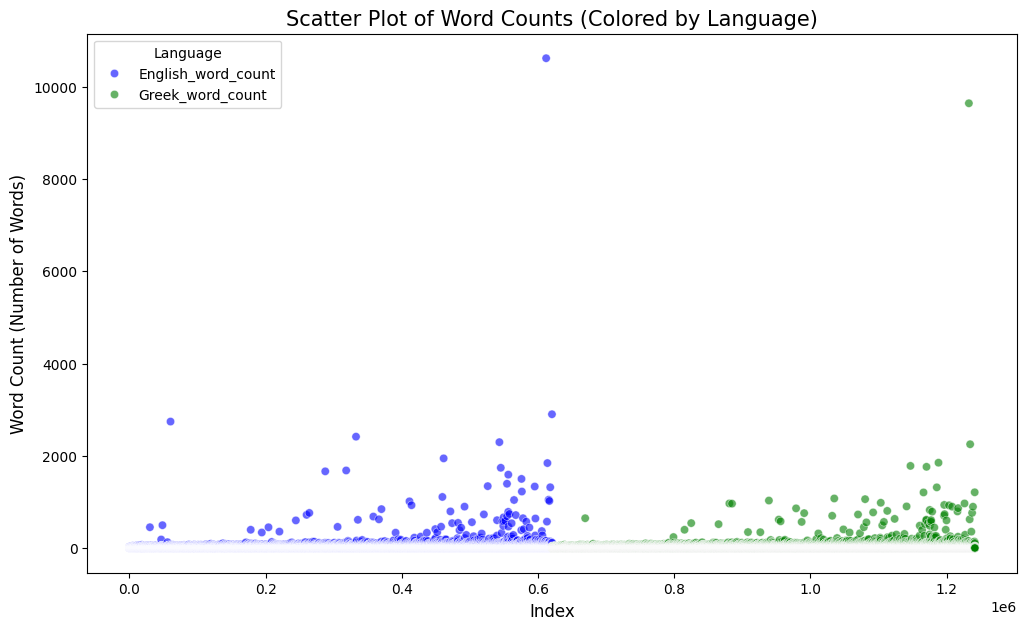

In [31]:
# Create a new DataFrame with sentence indices and word counts for both English and Greek
scatter_data = raw_data[['English_word_count', 'Greek_word_count']].melt(var_name='Language', value_name='Word_Count')

# Map 'Language' to colors
scatter_data['Color'] = scatter_data['Language'].map({'English_word_count': 'blue', 'Greek_word_count': 'green'})

# Create a scatter plot
plt.figure(figsize=(12, 7))
sns.scatterplot(x=range(len(scatter_data)), y='Word_Count', hue='Language', data=scatter_data, palette={'English_word_count': 'blue', 'Greek_word_count': 'green'}, alpha=0.6)

# Add titles and labels
plt.title("Scatter Plot of Word Counts (Colored by Language)", fontsize=15)
plt.xlabel("Index", fontsize=12)
plt.ylabel("Word Count (Number of Words)", fontsize=12)

# Show the plot
plt.show()


In [32]:
# Filter rows where English word count is greater than 200
filtered_data = raw_data[raw_data['English_word_count'] > 100]
filtered_data = raw_data[raw_data['Greek_word_count'] > 100]


# Display the filtered rows
filtered_data[['English', 'Greek', 'English_word_count', 'Greek_word_count']]


English  \
48511                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

## 7. Removing outliers


In [33]:
# Filter rows where English_word_count is greater than 100
filtered_data_english = raw_data[raw_data['English_word_count'] > 100]

# Filter rows where Greek_word_count is greater than 100
filtered_data_hindi = raw_data[raw_data['Greek_word_count'] > 100]

# Combine the indices of both filtered DataFrames
indices_to_drop = filtered_data_english.index.union(filtered_data_hindi.index)

# Drop the rows with the combined indices from the original DataFrame
raw_data.drop(indices_to_drop, inplace=True)

# Display the updated DataFrame
raw_data[['English', 'Greek', 'English_word_count', 'Greek_word_count']]

English  \
0                                                                      "Palace Brothers: There Is No One What Will Take Care of You (Drag City)".   
1                                                         To the sky, the sky-god, and the supreme God, the term Jumala (thunder-home) was given.   
2                                                                                                                                             .]]   
3                                                                                                                                    London: ]]].   
4                                                                                                          For us this is a lesson and a warning.   
...                                                                                                                                           ...   
620796  The observatory is the sole facility of the National Astronomy and Ionosphere Center (NAIC), which is the formal name of the observatory.   
620797                                                                         New observation points for infantry and artillery were also added.   
620798                                                                                                                       Sherwin Rosen, 1986.   
620799                                                                                                                  Bibliography at isfdb.org   
620800                                                                                             Toye says his father was an abusive alcoholic.   

                                                                                                                                                          Greek  \
0                                                                                                                                     Ἡ Μάνη ἐφθόνησε τὸν Μπέη.   
1                                                                                     Ǧ (g με ανάποδη οξυβαρεία) Ġayn (Αραβικά) Ghayn (Κυριλλικό) Göksel, Aslı.   
2                                                                                                                              Εκκλησία Αγίου Παντελεήμονος]]].   
3                                                                                                                                              Η Καθημερινή. ]]   
4                                                                                                         Για εμάς αυτό είναι ένα μάθημα και μια προειδοποίηση.   
...                                                                                                                                                         ...   
620796  Ως οργανισμός, το αστεροσκοπείο αυτό φέρει και την ονομασία Εθνικό Κέντρο Αστρονομίας και Ιονόσφαιρας (National Astronomy and Ionosphere Center, NAIC).   
620797                                                                           Ανέλαβε επίσης ρόλους παρατήρησης θέσεων πυροβολικού και εναέριου ασθενοφόρου.   
620798                                                                                                                                        Axl Rose το 1986.   
620799                                                                                                                       Πλανήτης των Πιθήκων στο isfdb.org   
620800                                                                                                        «Ζήνα Κουτσελίνη: «Ο πατέρας μου ήταν αλκοολικός.   

        English_word_count  Greek_word_count  
0                       14                 5  
1                       15                11  
2                        1                 3  
3                        2                 3  
4                        9                 9  
...                    ...               ...  
620796                  22                20  
620797          

In [34]:
# Check for empty strings in English and Hindi columns
empty_english = raw_data[raw_data['English'].str.strip() == '']
empty_hindi = raw_data[raw_data['Greek'].str.strip() == '']

# Display rows with empty English strings
print("Rows with empty English strings:")
print(empty_english[['English', 'Greek', 'English_word_count', 'Greek_word_count']])

# Display rows with empty Greek strings
print("\nRows with empty Greek strings:")
print(empty_hindi[['English', 'Greek', 'English_word_count', 'Greek_word_count']])


Rows with empty English strings:
Empty DataFrame
Columns: [English, Greek, English_word_count, Greek_word_count]
Index: []

Rows with empty Greek strings:
Empty DataFrame
Columns: [English, Greek, English_word_count, Greek_word_count]
Index: []


## 8. cleaning other language formats.
- As per our task we need to English - Greek so removing other languages from datasets.

In [35]:
# Define regex patterns to match Chinese, Sanskrit (Devanagari), and Urdu characters
chinese_pattern = r'[\u4e00-\u9fff]'  # Chinese characters
sanskrit_pattern = r'[\u0900-\u097F]'  # Devanagari characters (same as Greek)
urdu_pattern = r'[\u0600-\u06FF]'     # Arabic script (Urdu)

# Combine the patterns into one regex to detect any of these languages
non_Greek_pattern = chinese_pattern + "|" + sanskrit_pattern + "|" + urdu_pattern

# Filter rows where the Greek sentence contains any of these characters (non-Greek)
non_Greek_rows = raw_data[raw_data['English'].str.contains(non_Greek_pattern, regex=True)]

# Display the rows with non-Greek sentences in the Greek column
print("Rows with Chinese, Sanskrit, or Urdu sentences in the Hindi column:")
non_Greek_rows[['English', 'Greek', 'English_word_count', 'Greek_word_count']]

Rows with Chinese, Sanskrit, or Urdu sentences in the Hindi column:


English  \
1537                                                                                                                                                                                                                                      (至正始中，代夏侯儒为征蜀护军，统属征西。) Yu Huan.   
5468                                                                                                                                                   In 1963, she received an award for her role in the political film La Waqt Lel Hob (لا وقت للحب, No Time for Love).   
8074                                                                                                         For the same reason the Chinese also use natural language numerals, for example 100 is written as 壹佰, which can never be forged into 壹仟(1000) or 伍仟壹佰(5100).   
10630                                                                                                                             Hamama is also known for having played the lead role in the first Egyptian mystery film Manzel Raqam 13 (منزل رقم 13, House Number 13).   
11255                                                                                                                                                                               Eight gives an idea of growing prosperous, because the letter (八) broadens gradually.   
...                                                                                                                                                                                                                                                                   ...   
618929                                                                                         The adjective "aigýpti-"/"aigýptios" was borrowed into Coptic as "gyptios", and from there into Arabic as "qubṭī", back formed into "قبط" ("qubṭ"), whence English "Copt".   
619239                                                                                                                                                                                                                                   Daikan (代官)- Assistant deputies.   
619814                                                                  Nowruz (Persian: نوروز‎ Nowruz, ; literally "new day") is the name of the Iranian New Year, also known as the Persian New Year, which is celebrated worldwide by various ethno-linguistic groups.   
620353  The Kūnaṛ River (Pashto: کونړ سيند‎), also known in its upper reaches as the Mastuj (مستوج سيند), Chitral (چترال سيند; دریائے چترال), or Kama River (کامې سيند), is about 480 km long, located in northern Khyber Pakhtunkhwa, Pakistan, and eastern Afghanistan.   
620716                                                Hwanggumpyong Island (Korean: 황금평, simplified Chinese: 黄金坪; traditional Chinese: 黃金坪; pinyin: Huángjīnpíng) is an island on the Yalu River, which forms a section of the land border between North Korea and China.   

                                                                                                                                                                                                                                                                            Greek  \
1537                                                                                                                                                         Από την ράβδο του Ιωσήφ εξήλθε περιστέρι το οποίο έκατσε στο κεφάλι του Ιωσήφ, οπότε εκληρώθη η Παρθενος στον Ιωσήφ.   
5468                                                                                                                                                                    Το 1963 βραβεύτηκε για τον ρόλο της στην πολιτική ταινία La Waqt Lel Hob (لا وقت للحب, No Time for Love).   
8074                                                                                            Για τον ίδιο λόγο, οι Κινέζοι χρησιμοποιούν επίσης φυσικά αριθμούς γλώσσα, για παράδειγμα, το 100 γράφ

In [36]:
# Define regex patterns to match Chinese, Sanskrit (Devanagari), and Urdu characters
chinese_pattern = r'[\u4e00-\u9fff]'  # Chinese characters
sanskrit_pattern = r'[\u0900-\u097F]'  # Devanagari characters (same as Hindi)
urdu_pattern = r'[\u0600-\u06FF]'     # Arabic script (Urdu)

# Combine the patterns into one regex to detect any of these languages
non_Greek_pattern = chinese_pattern + "|" + sanskrit_pattern + "|" + urdu_pattern

# Drop rows where the English sentence contains any of these characters (non-English)
raw_data.drop(raw_data[raw_data['English'].str.contains(non_Greek_pattern, regex=True)].index, inplace=True)

# Display the updated DataFrame to verify
raw_data[['English', 'Greek', 'English_word_count', 'Greek_word_count']]


English  \
0                                                                      "Palace Brothers: There Is No One What Will Take Care of You (Drag City)".   
1                                                         To the sky, the sky-god, and the supreme God, the term Jumala (thunder-home) was given.   
2                                                                                                                                             .]]   
3                                                                                                                                    London: ]]].   
4                                                                                                          For us this is a lesson and a warning.   
...                                                                                                                                           ...   
620796  The observatory is the sole facility of the National Astronomy and Ionosphere Center (NAIC), which is the formal name of the observatory.   
620797                                                                         New observation points for infantry and artillery were also added.   
620798                                                                                                                       Sherwin Rosen, 1986.   
620799                                                                                                                  Bibliography at isfdb.org   
620800                                                                                             Toye says his father was an abusive alcoholic.   

                                                                                                                                                          Greek  \
0                                                                                                                                     Ἡ Μάνη ἐφθόνησε τὸν Μπέη.   
1                                                                                     Ǧ (g με ανάποδη οξυβαρεία) Ġayn (Αραβικά) Ghayn (Κυριλλικό) Göksel, Aslı.   
2                                                                                                                              Εκκλησία Αγίου Παντελεήμονος]]].   
3                                                                                                                                              Η Καθημερινή. ]]   
4                                                                                                         Για εμάς αυτό είναι ένα μάθημα και μια προειδοποίηση.   
...                                                                                                                                                         ...   
620796  Ως οργανισμός, το αστεροσκοπείο αυτό φέρει και την ονομασία Εθνικό Κέντρο Αστρονομίας και Ιονόσφαιρας (National Astronomy and Ionosphere Center, NAIC).   
620797                                                                           Ανέλαβε επίσης ρόλους παρατήρησης θέσεων πυροβολικού και εναέριου ασθενοφόρου.   
620798                                                                                                                                        Axl Rose το 1986.   
620799                                                                                                                       Πλανήτης των Πιθήκων στο isfdb.org   
620800                                                                                                        «Ζήνα Κουτσελίνη: «Ο πατέρας μου ήταν αλκοολικός.   

        English_word_count  Greek_word_count  
0                       14                 5  
1                       15                11  
2                        1                 3  
3                        2                 3  
4                        9                 9  
...                    ...               ...  
620796                  22                20  
620797          

## 9. Distribution of both languages.

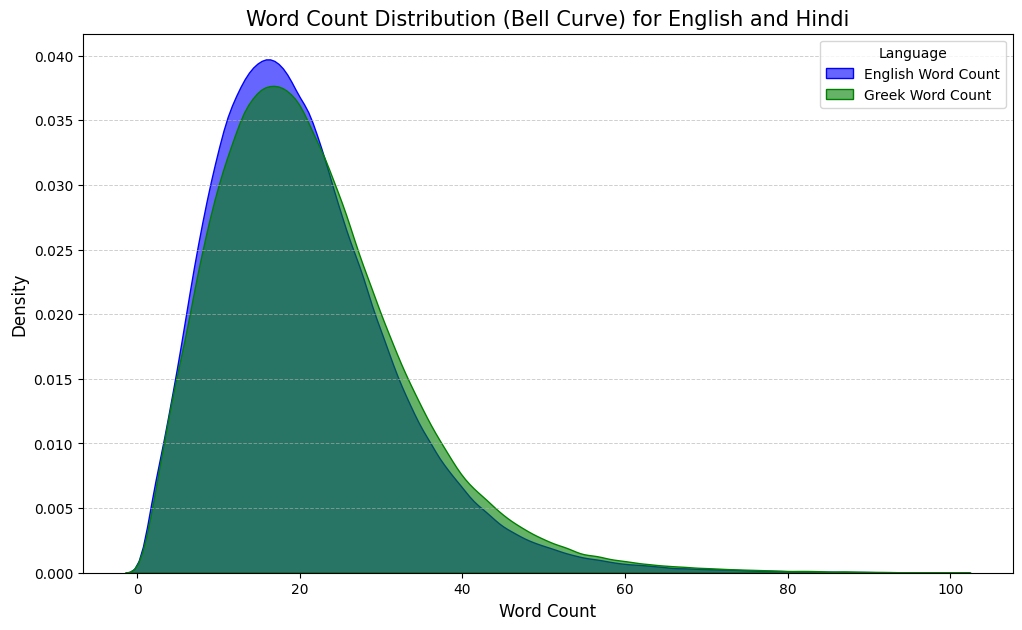

English Word Count - Mean: 20.560086131780977  Std Dev: 11.395140038683131
Hindi Word Count - Mean: 21.51594359402962  Std Dev: 11.962304792686552


In [37]:
# Plot the distribution of the word counts in the English and Hindi columns

plt.figure(figsize=(12, 7))

# Plot for English word count
sns.kdeplot(raw_data['English_word_count'], label='English Word Count', fill=True, color='blue', alpha=0.6)

# Plot for Hindi word count
sns.kdeplot(raw_data['Greek_word_count'], label='Greek Word Count', fill=True, color='green', alpha=0.6)

# Add titles and labels
plt.title('Word Count Distribution (Bell Curve) for English and Hindi', fontsize=15)
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title="Language")
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

# Show the plot
plt.show()

# Print the mean and standard deviation for both English and Greek word counts
print("English Word Count - Mean:", raw_data['English_word_count'].mean(), " Std Dev:", raw_data['English_word_count'].std())
print("Hindi Word Count - Mean:", raw_data['Greek_word_count'].mean(), " Std Dev:", raw_data['Greek_word_count'].std())


## 10. limiting the datasets by sentence length.
- After understanding the data distribution we can eliminate few more instances of dataset based on wordcount.

In [38]:
# Drop rows where Greek word count is more than 50
raw_data.drop(raw_data[raw_data['Greek_word_count'] > 50].index, inplace=True)

# Display the updated DataFrame to verify
raw_data[['English', 'Greek', 'English_word_count', 'Greek_word_count']]


English  \
0                                                                      "Palace Brothers: There Is No One What Will Take Care of You (Drag City)".   
1                                                         To the sky, the sky-god, and the supreme God, the term Jumala (thunder-home) was given.   
2                                                                                                                                             .]]   
3                                                                                                                                    London: ]]].   
4                                                                                                          For us this is a lesson and a warning.   
...                                                                                                                                           ...   
620796  The observatory is the sole facility of the National Astronomy and Ionosphere Center (NAIC), which is the formal name of the observatory.   
620797                                                                         New observation points for infantry and artillery were also added.   
620798                                                                                                                       Sherwin Rosen, 1986.   
620799                                                                                                                  Bibliography at isfdb.org   
620800                                                                                             Toye says his father was an abusive alcoholic.   

                                                                                                                                                          Greek  \
0                                                                                                                                     Ἡ Μάνη ἐφθόνησε τὸν Μπέη.   
1                                                                                     Ǧ (g με ανάποδη οξυβαρεία) Ġayn (Αραβικά) Ghayn (Κυριλλικό) Göksel, Aslı.   
2                                                                                                                              Εκκλησία Αγίου Παντελεήμονος]]].   
3                                                                                                                                              Η Καθημερινή. ]]   
4                                                                                                         Για εμάς αυτό είναι ένα μάθημα και μια προειδοποίηση.   
...                                                                                                                                                         ...   
620796  Ως οργανισμός, το αστεροσκοπείο αυτό φέρει και την ονομασία Εθνικό Κέντρο Αστρονομίας και Ιονόσφαιρας (National Astronomy and Ionosphere Center, NAIC).   
620797                                                                           Ανέλαβε επίσης ρόλους παρατήρησης θέσεων πυροβολικού και εναέριου ασθενοφόρου.   
620798                                                                                                                                        Axl Rose το 1986.   
620799                                                                                                                       Πλανήτης των Πιθήκων στο isfdb.org   
620800                                                                                                        «Ζήνα Κουτσελίνη: «Ο πατέρας μου ήταν αλκοολικός.   

        English_word_count  Greek_word_count  
0                       14                 5  
1                       15                11  
2                        1                 3  
3                        2                 3  
4                        9                 9  
...                    ...               ...  
620796                  22                20  
620797          

In [39]:
# Convert all text in the 'English' column to lowercase
raw_data['English'] = raw_data['English'].str.lower()

# Verify the changes
raw_data  # Display a random sample of 10 rows


English  \
0                                                                      "palace brothers: there is no one what will take care of you (drag city)".   
1                                                         to the sky, the sky-god, and the supreme god, the term jumala (thunder-home) was given.   
2                                                                                                                                             .]]   
3                                                                                                                                    london: ]]].   
4                                                                                                          for us this is a lesson and a warning.   
...                                                                                                                                           ...   
620796  the observatory is the sole facility of the national astronomy and ionosphere center (naic), which is the formal name of the observatory.   
620797                                                                         new observation points for infantry and artillery were also added.   
620798                                                                                                                       sherwin rosen, 1986.   
620799                                                                                                                  bibliography at isfdb.org   
620800                                                                                             toye says his father was an abusive alcoholic.   

                                                                                                                                                          Greek  \
0                                                                                                                                     Ἡ Μάνη ἐφθόνησε τὸν Μπέη.   
1                                                                                     Ǧ (g με ανάποδη οξυβαρεία) Ġayn (Αραβικά) Ghayn (Κυριλλικό) Göksel, Aslı.   
2                                                                                                                              Εκκλησία Αγίου Παντελεήμονος]]].   
3                                                                                                                                              Η Καθημερινή. ]]   
4                                                                                                         Για εμάς αυτό είναι ένα μάθημα και μια προειδοποίηση.   
...                                                                                                                                                         ...   
620796  Ως οργανισμός, το αστεροσκοπείο αυτό φέρει και την ονομασία Εθνικό Κέντρο Αστρονομίας και Ιονόσφαιρας (National Astronomy and Ionosphere Center, NAIC).   
620797                                                                           Ανέλαβε επίσης ρόλους παρατήρησης θέσεων πυροβολικού και εναέριου ασθενοφόρου.   
620798                                                                                                                                        Axl Rose το 1986.   
620799                                                                                                                       Πλανήτης των Πιθήκων στο isfdb.org   
620800                                                                                                        «Ζήνα Κουτσελίνη: «Ο πατέρας μου ήταν αλκοολικός.   

        English_word_count  Greek_word_count  
0                       14                 5  
1                       15                11  
2                        1                 3  
3                        2                 3  
4                        9                 9  
...                    ...               ...  
620796                  22                20  
620797          

In [40]:
# Select only the 'English' and 'Greek' columns
processed_data = raw_data[['English', 'Greek']]

# Define the output file path
processed_output_path = "../Datasets/WikiMatrix/Processed/processed_en-el.csv"

# Write the processed data to a CSV file
processed_data.to_csv(processed_output_path, index=False, encoding='utf-8')

print(f"Processed data has been saved to: {processed_output_path}")

Processed data has been saved to: ../Datasets/WikiMatrix/Processed/processed_en-el.csv


In [41]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 603803 entries, 0 to 620800
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   English  603803 non-null  object
 1   Greek    603803 non-null  object
dtypes: object(2)
memory usage: 13.8+ MB
